In [1]:
import os
import pickle
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Dynamically set the CWD
froot = os.getcwd()

# Load the XGB hyperparameters and game state shot splits
n_itr = 500
param_path = f'/../../data/goal_prob_model/hyperparameter_search_{n_itr}itr_coarse.pkl'
with open(froot + param_path, 'rb') as f:
    hyperparameter_data = pickle.load(f)
state_lbls = ['Even', 'PP', 'PK']
n_states = len(state_lbls)
cv_params = hyperparameter_data['cv_params']
cv_scores = hyperparameter_data['cv_scores']
param_ranges = hyperparameter_data['xgb_params']
print(list(param_ranges.keys()))


['n_estimators', 'learning_rate', 'subsample', 'min_child_weight', 'max_leaves', 'max_depth', 'lambda', 'gamma']


In [3]:
# Convert the parameter sets to a dataframe
param_df = [pd.DataFrame(cv_params[state], columns=cv_params[state][0].keys()) for state in state_lbls]

# Convert negative logloss to positive and find max values
for state in state_lbls:
    cv_scores[state] = [-score for score in cv_scores[state]]
max_scores = [max(cv_scores[state]) for state in state_lbls]


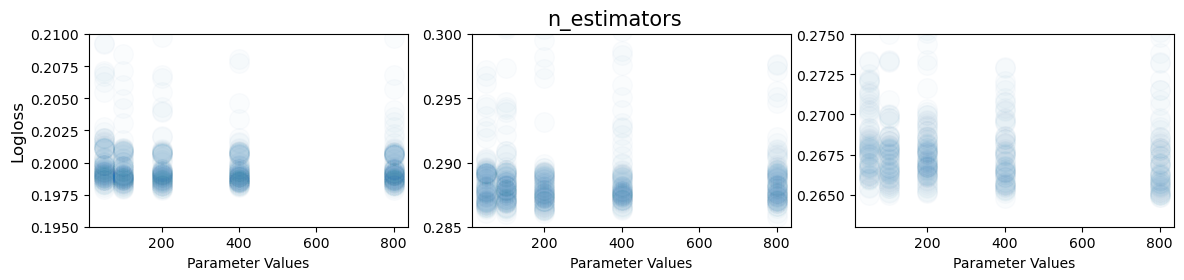

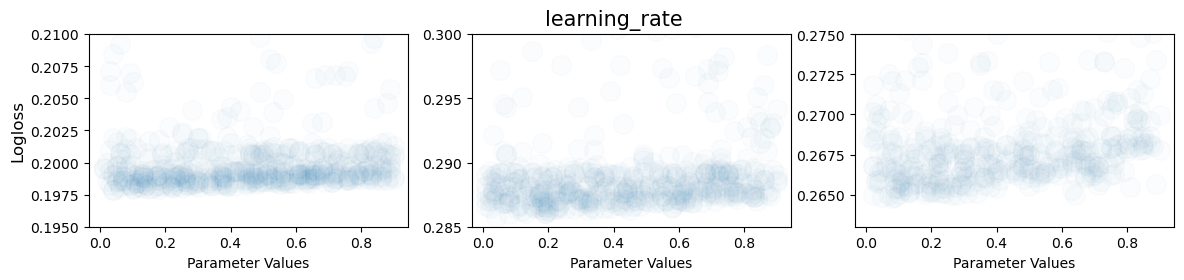

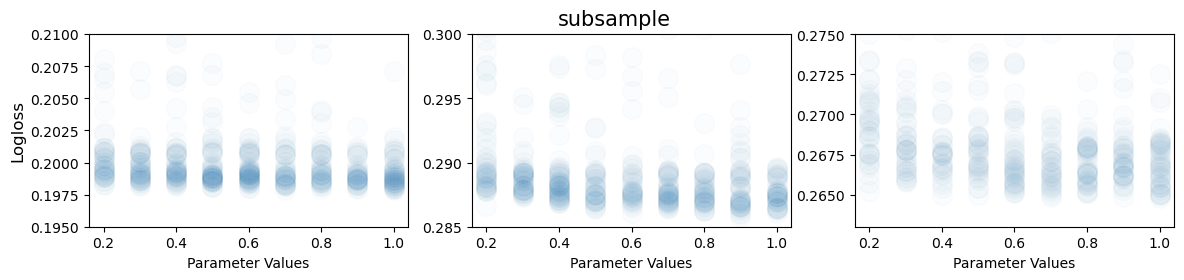

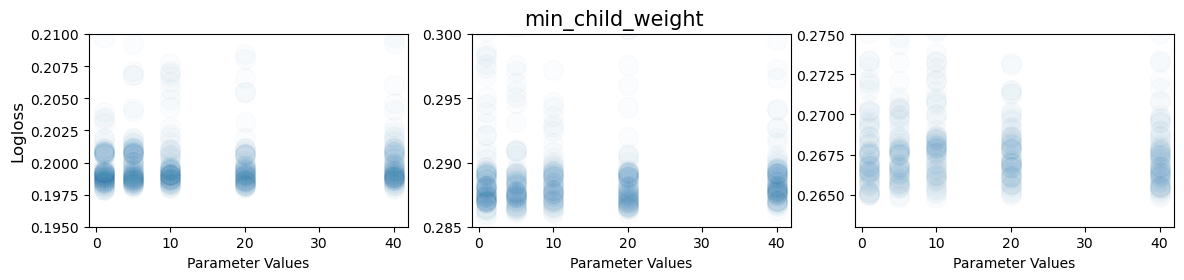

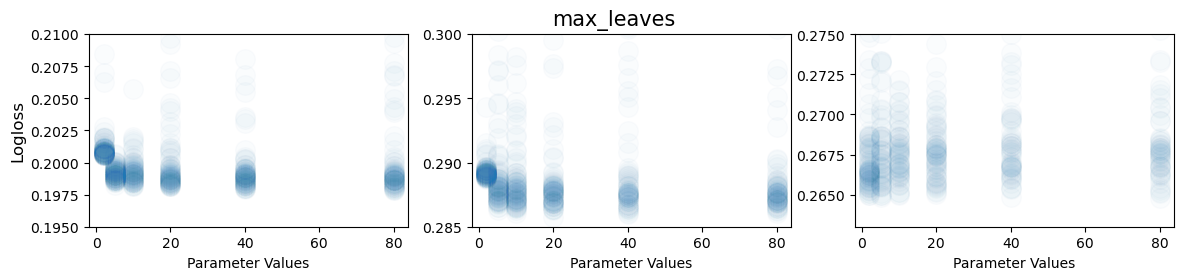

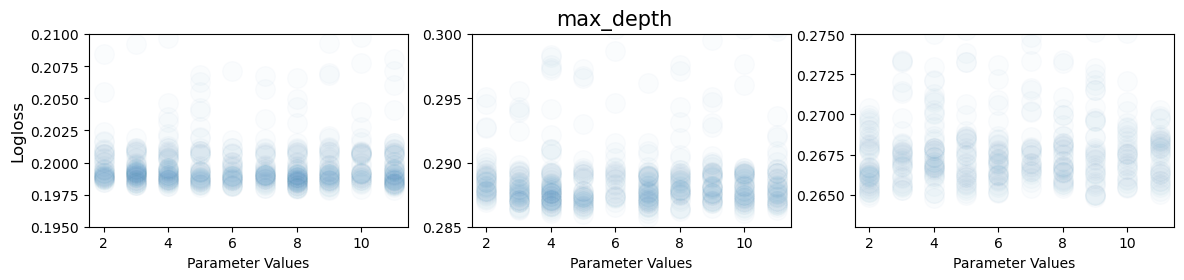

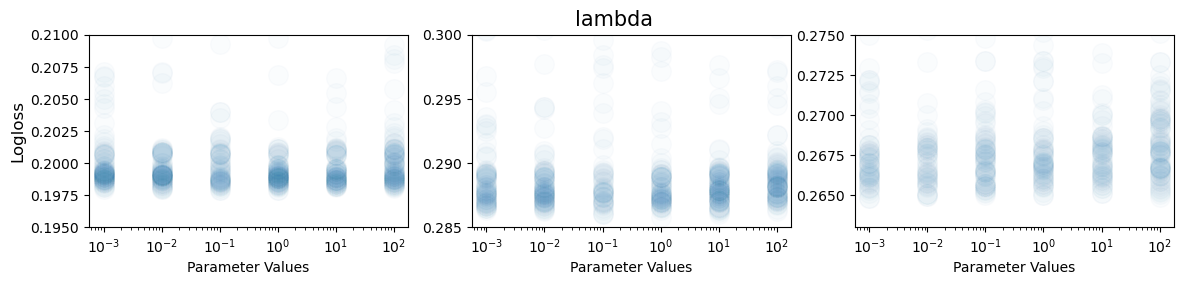

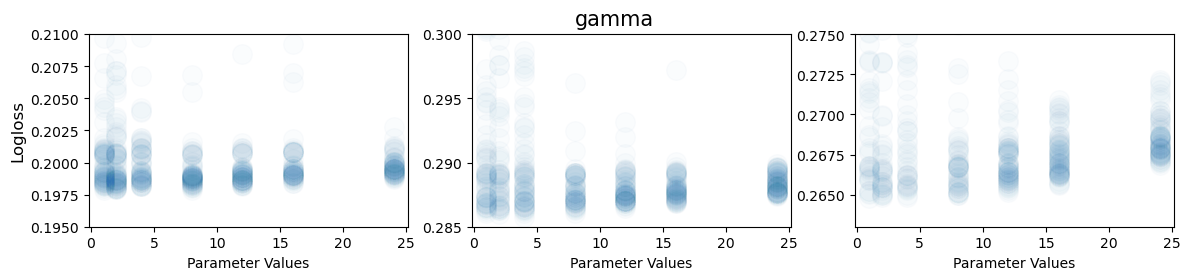

In [4]:
for p, param in enumerate(param_ranges.keys()):
    fig, axes = plt.subplots(1, len(state_lbls), figsize=(14, 2.5))
    param_range = param_ranges[param]
    for i, state in enumerate(state_lbls):
        axes[i].scatter(param_df[i][param], cv_scores[state], alpha=0.02, s=200)
        axes[i].set_xlabel('Parameter Values', fontsize=10)
        if p == 6:
            axes[i].set_xscale('log')
        # if p not in [1, 2, 5]:
        #     axes[i].set_xscale('log')
        #     axes[i].set_xticks(param_range)
        #     axes[i].set_xticklabels([f'{param:1.0e}' for param in param_range], fontsize=8)
        # elif p == 1:
        #     axes[i].set_xticks(param_range[::10])
        # else:
        #     axes[i].set_xticks(param_range)
        if i == 0:
            axes[i].set_ylim([0.195, 0.21])
        elif i == 1:
            axes[i].set_ylim([0.285, 0.3])
        elif i == 2:
            axes[i].set_ylim([0.263, 0.275])
    axes[0].set_ylabel('Logloss', fontsize=12)
    fig.suptitle(f'{param}', fontsize=15)
    

In [5]:
# Display the top parameter sets to see relationships
for i, state in enumerate(state_lbls):
    print(f'Results for the {state} state')
    display(pd.concat([param_df[i][:20], pd.Series(cv_scores[state][:20])], axis=1))


Results for the Even state


,subsample,n_estimators,min_child_weight,max_leaves,max_depth,learning_rate,lambda,gamma,0
0,0.7,200,1,80,9,0.04,1.000,1,0.197858
1,1.0,800,1,80,11,0.04,0.100,8,0.197895
2,1.0,50,40,80,9,0.18,0.100,2,0.197902
3,0.8,100,1,40,8,0.15,1.000,2,0.197912
4,0.9,200,1,80,10,0.10,0.010,2,0.197946
5,0.9,200,5,40,7,0.16,0.001,8,0.197985
6,1.0,200,10,40,8,0.22,0.010,2,0.198001
7,0.6,100,20,80,7,0.13,0.010,2,0.198018
8,1.0,800,10,80,8,0.25,0.010,1,0.198027
9,1.0,200,40,40,8,0.06,100.000,2,0.198029


Results for the PP state


,subsample,n_estimators,min_child_weight,max_leaves,max_depth,learning_rate,lambda,gamma,0
0,0.9,800,1,20,7,0.04,1.000,4,0.285781
1,0.9,100,1,40,5,0.08,10.000,2,0.286000
2,0.9,50,20,40,10,0.19,0.100,4,0.286039
3,1.0,800,10,10,4,0.13,0.100,1,0.286048
4,0.6,200,5,80,7,0.19,0.100,8,0.286097
5,0.8,100,10,80,8,0.20,10.000,4,0.286198
6,0.8,200,5,40,4,0.12,0.010,1,0.286263
7,1.0,200,1,20,11,0.18,100.000,2,0.286290
8,0.8,400,40,80,7,0.32,1.000,8,0.286322
9,0.8,200,1,5,3,0.20,0.010,2,0.286325


Results for the PK state


,subsample,n_estimators,min_child_weight,max_leaves,max_depth,learning_rate,lambda,gamma,0
0,1.0,400,10,80,4,0.08,0.001,1,0.264800
1,0.9,800,40,5,9,0.09,0.001,4,0.264828
2,0.7,800,5,40,2,0.05,100.000,2,0.264861
3,1.0,800,5,2,9,0.28,0.010,2,0.264960
4,1.0,100,40,2,9,0.64,0.010,2,0.264964
5,0.4,800,20,10,9,0.07,0.100,8,0.264976
6,0.5,800,1,5,5,0.02,1.000,8,0.264995
7,0.7,50,1,5,2,0.26,1.000,4,0.264998
8,1.0,800,1,10,9,0.18,0.010,2,0.265041
9,1.0,800,10,20,11,0.10,100.000,1,0.265061
